# Objective Of The Project:

- As the dataset is about the churn of the customers and we will focussed on developing a suitable model for churn predicts. Business Demand behind the project is to increasing customer retention.

- From the give dataset Churn being the Dependent Variable and rest of the features(Columns) mentioned are Independent variables. Thus, intial data cleansing/Exploratory Data Analysis will be done to get an enhanced performing Machine Learning Model. 

- We will implement various predictive models and choose the best performing model amongst them. Also, we look onto the probablity of the customers getting churned out basis the analysis over the given dataset.

- We will also focus and look the data using data visualization(Using Matplotlib, Seaborn libraries..) as and when required.

- My Conclusion and final insights on the Models developed. 

In [1]:
# Importing required libraries:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load the dataset:
churn_dataset = pd.read_csv('churndata.csv')

In [3]:
churn_dataset.head()

,respondent_id,churned,age,gender,loyalty_level,how_long_a_customer,how_far_away,feel_valued_as_customer,get_often_inspiration,good_product_overview,pick_up_flexibility,fair_prices,looking_forward_to_the_next_12_months,see_improvements_recently,informed_about_new_products,find_productst_i_want,i_enjoy_buying
0,1,0,3,1.0,NaN,2,5.0,1,2,2,1,1,4,1,NaN,1,2
1,10,0,3,2.0,1.0,5,1.0,1,1,2,1,2,1,1,NaN,2,1
2,100,1,3,1.0,1.0,3,2.0,5,1,1,1,4,3,1,NaN,2,1
3,1000,0,3,1.0,3.0,6,1.0,1,1,4,1,5,2,2,NaN,1,1
4,10000,0,0,NaN,1.0,0,1.0,1,2,2,1,2,3,1,1.0,1,3


In [4]:
# Get the shape of the dataset:
churn_dataset.shape

(24513, 17)

In [5]:
# Print Columns Names
churn_dataset.columns

Index(['respondent_id', 'churned', 'age', 'gender', 'loyalty_level',
       'how_long_a_customer', 'how_far_away', 'feel_valued_as_customer',
       'get_often_inspiration', 'good_product_overview', 'pick_up_flexibility',
       'fair_prices', 'looking_forward_to_the_next_12_months',
       'see_improvements_recently', 'informed_about_new_products',
       'find_productst_i_want', 'i_enjoy_buying'],
      dtype='object')

With this we can observe that which columns can have an affect over our target columns, which is the churn of customers. 

For Example: Some columns we could observe are age, gender, loyalty_level, fair_prices, i_enjoy_buying, etc.. Just as an initial rough observation.

In [6]:
# Get information(datatypes, number of entries in each column) about each columns:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24513 entries, 0 to 24512
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   respondent_id                          24513 non-null  int64  
 1   churned                                24513 non-null  int64  
 2   age                                    24513 non-null  int64  
 3   gender                                 22308 non-null  float64
 4   loyalty_level                          19283 non-null  float64
 5   how_long_a_customer                    24513 non-null  int64  
 6   how_far_away                           23239 non-null  float64
 7   feel_valued_as_customer                24513 non-null  int64  
 8   get_often_inspiration                  24513 non-null  int64  
 9   good_product_overview                  24513 non-null  int64  
 10  pick_up_flexibility                    24513 non-null  int64  
 11  fa

In [7]:
# Check are their any null values in the data:
churn_dataset.isna().sum()

respondent_id                                0
churned                                      0
age                                          0
gender                                    2205
loyalty_level                             5230
how_long_a_customer                          0
how_far_away                              1274
feel_valued_as_customer                      0
get_often_inspiration                        0
good_product_overview                        0
pick_up_flexibility                          0
fair_prices                                  0
looking_forward_to_the_next_12_months        0
see_improvements_recently                    0
informed_about_new_products              16017
find_productst_i_want                        0
i_enjoy_buying                               0
dtype: int64

**Thus, we can see that Independent Variable columns - gender, loyalty_level, how_far_away, informed_about_new_products -- have NAN or null values.**

In [8]:
# Since the null values are huge in number, thus we need to fill these null values:
# first we will work on gender column and fill its null entries with 3, as 3 from the dataset represents as 'OTHERS' in gender. 
# Rest of the columns having null entires will be filled using the usual fillna() method.

churn_dataset['gender'].fillna('3', inplace=True)

In [9]:
churn_dataset['gender'].isna().sum()

0

In [10]:
df = churn_dataset.fillna(method='bfill')

In [11]:
df.isna().sum()

respondent_id                            0
churned                                  0
age                                      0
gender                                   0
loyalty_level                            0
how_long_a_customer                      0
how_far_away                             0
feel_valued_as_customer                  0
get_often_inspiration                    0
good_product_overview                    0
pick_up_flexibility                      0
fair_prices                              0
looking_forward_to_the_next_12_months    0
see_improvements_recently                0
informed_about_new_products              4
find_productst_i_want                    0
i_enjoy_buying                           0
dtype: int64

In [12]:
df = df.fillna(method='pad')

In [13]:
df.isna().sum()

respondent_id                            0
churned                                  0
age                                      0
gender                                   0
loyalty_level                            0
how_long_a_customer                      0
how_far_away                             0
feel_valued_as_customer                  0
get_often_inspiration                    0
good_product_overview                    0
pick_up_flexibility                      0
fair_prices                              0
looking_forward_to_the_next_12_months    0
see_improvements_recently                0
informed_about_new_products              0
find_productst_i_want                    0
i_enjoy_buying                           0
dtype: int64

**Now, all the missing values has been filled up without affecting the essence of the given dataset.**

In [14]:
df.shape

(24513, 17)

In [15]:
df.churned.value_counts()

0    14796
1     9717
Name: churned, dtype: int64

In [16]:
df.shape

(24513, 17)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24513 entries, 0 to 24512
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   respondent_id                          24513 non-null  int64  
 1   churned                                24513 non-null  int64  
 2   age                                    24513 non-null  int64  
 3   gender                                 24513 non-null  object 
 4   loyalty_level                          24513 non-null  float64
 5   how_long_a_customer                    24513 non-null  int64  
 6   how_far_away                           24513 non-null  float64
 7   feel_valued_as_customer                24513 non-null  int64  
 8   get_often_inspiration                  24513 non-null  int64  
 9   good_product_overview                  24513 non-null  int64  
 10  pick_up_flexibility                    24513 non-null  int64  
 11  fa

In [18]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,respondent_id,churned,age,loyalty_level,how_long_a_customer,how_far_away,feel_valued_as_customer,get_often_inspiration,good_product_overview,pick_up_flexibility,...,informed_about_new_products,find_productst_i_want,i_enjoy_buying,gender_0.0,gender_1.0,gender_2.0,gender_3.0,gender_4.0,gender_5.0,gender_3
0,1,0,3,1.0,2,5.0,1,2,2,1,...,1.0,1,2,0,1,0,0,0,0,0
1,10,0,3,1.0,5,1.0,1,1,2,1,...,1.0,2,1,0,0,1,0,0,0,0
2,100,1,3,1.0,3,2.0,5,1,1,1,...,1.0,2,1,0,1,0,0,0,0,0
3,1000,0,3,3.0,6,1.0,1,1,4,1,...,1.0,1,1,0,1,0,0,0,0,0
4,10000,0,0,1.0,0,1.0,1,2,2,1,...,1.0,1,3,0,0,0,0,0,0,1


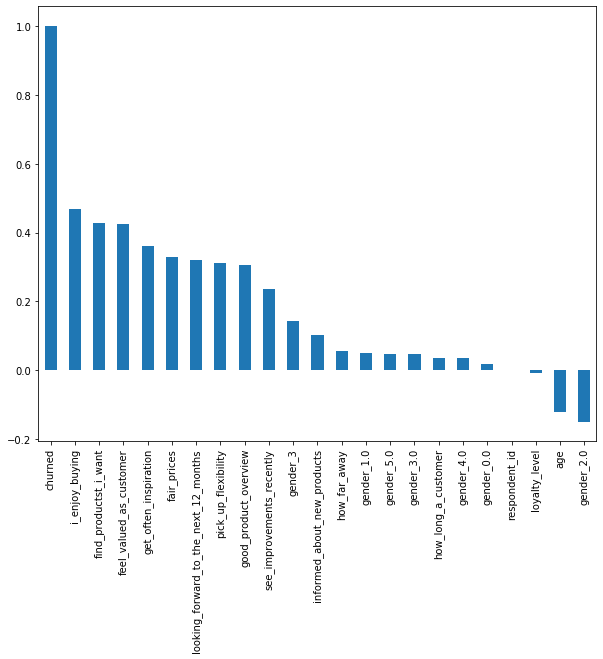

In [19]:
# Building a correlation of all predictors with churned variable:
plt.figure(figsize=(10,8))
df_dummies.corr()['churned'].sort_values(ascending = False).plot(kind='bar');

# Insights from the correlation plot:

- HIGH Churn seen in case all the factors except for gender, respondent_id & loyalty_level where the churned is found negligible.

**This is also evident from the Heatmap below.**

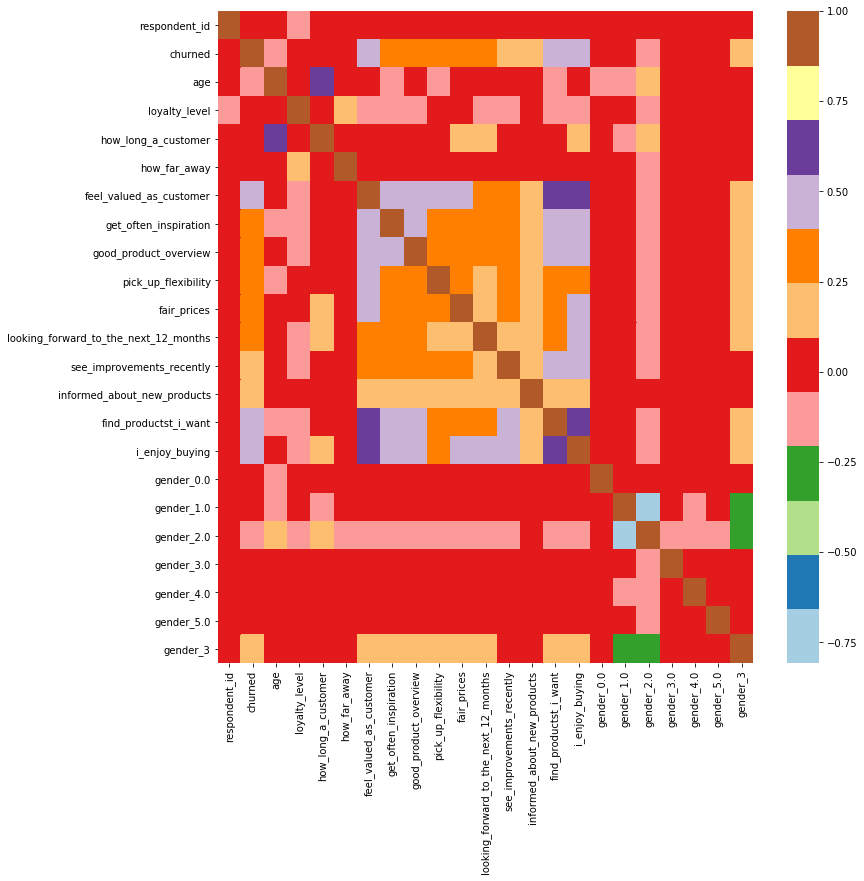

In [20]:
# Heatmap:

plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap="Paired");

In [21]:
df_dummies.columns

Index(['respondent_id', 'churned', 'age', 'loyalty_level',
       'how_long_a_customer', 'how_far_away', 'feel_valued_as_customer',
       'get_often_inspiration', 'good_product_overview', 'pick_up_flexibility',
       'fair_prices', 'looking_forward_to_the_next_12_months',
       'see_improvements_recently', 'informed_about_new_products',
       'find_productst_i_want', 'i_enjoy_buying', 'gender_0.0', 'gender_1.0',
       'gender_2.0', 'gender_3.0', 'gender_4.0', 'gender_5.0', 'gender_3'],
      dtype='object')

- Dropping columns not affecting the churn .i.e respondent_id & loyalty_level.

In [22]:
df1 = df_dummies.drop(['respondent_id','loyalty_level'], axis=1)
df1.head()

,churned,age,how_long_a_customer,how_far_away,feel_valued_as_customer,get_often_inspiration,good_product_overview,pick_up_flexibility,fair_prices,looking_forward_to_the_next_12_months,...,informed_about_new_products,find_productst_i_want,i_enjoy_buying,gender_0.0,gender_1.0,gender_2.0,gender_3.0,gender_4.0,gender_5.0,gender_3
0,0,3,2,5.0,1,2,2,1,1,4,...,1.0,1,2,0,1,0,0,0,0,0
1,0,3,5,1.0,1,1,2,1,2,1,...,1.0,2,1,0,0,1,0,0,0,0
2,1,3,3,2.0,5,1,1,1,4,3,...,1.0,2,1,0,1,0,0,0,0,0
3,0,3,6,1.0,1,1,4,1,5,2,...,1.0,1,1,0,1,0,0,0,0,0
4,0,0,0,1.0,1,2,2,1,2,3,...,1.0,1,3,0,0,0,0,0,0,1


# Spliting the dataset for training and testing purpose for further Machine Learning Model Building:

In [23]:
X = df1.drop('churned', axis=1)
X.head()

,age,how_long_a_customer,how_far_away,feel_valued_as_customer,get_often_inspiration,good_product_overview,pick_up_flexibility,fair_prices,looking_forward_to_the_next_12_months,see_improvements_recently,informed_about_new_products,find_productst_i_want,i_enjoy_buying,gender_0.0,gender_1.0,gender_2.0,gender_3.0,gender_4.0,gender_5.0,gender_3
0,3,2,5.0,1,2,2,1,1,4,1,1.0,1,2,0,1,0,0,0,0,0
1,3,5,1.0,1,1,2,1,2,1,1,1.0,2,1,0,0,1,0,0,0,0
2,3,3,2.0,5,1,1,1,4,3,1,1.0,2,1,0,1,0,0,0,0,0
3,3,6,1.0,1,1,4,1,5,2,2,1.0,1,1,0,1,0,0,0,0,0
4,0,0,1.0,1,2,2,1,2,3,1,1.0,1,3,0,0,0,0,0,0,1


In [24]:
y = df1['churned']
y.head()
print(y.shape)

(24513,)


In [25]:
# Train Test Split:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2)

# Model 1: K Nearest Neighbor.

In [26]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
knn=neighbors.KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred=knn.predict(X_test)

In [30]:
knn_acc = accuracy_score(y_test, y_pred)
print(knn_acc*100,'%')

71.89475831123802 %


In [31]:
confusion_matrix(y_test,y_pred)

array([[2374,  598],
       [ 780, 1151]], dtype=int64)

In [32]:
results = pd.DataFrame()
results

""


In [33]:
tempResults = pd.DataFrame({'Algorithm':['K Nearest Neighbor'], 'Accuracy':[knn_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,K Nearest Neighbor,0.718948


# Insights from KNN:

- Considering a random K-value of 3 for analysis above, we got the accuracy of KNN model over this data as 71.89%.
- We have 4903 K-values wherein, iterating our model over these K-values 4903 number of times, we might reviece a higher accuracy of the model but it would be higher on computation.

# Deploying SVM model:

In [34]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train,y_train)

SVC()

In [35]:
y_pred = svc.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [36]:
svc_acc = accuracy_score(y_test, y_pred)
print(svc_acc*100,'%')

76.52457678972058 %


In [37]:
tempResults = pd.DataFrame({'Algorithm':['SVM Model'], 'Accuracy':[svc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,K Nearest Neighbor,0.718948
0,SVM Model,0.765246


# Deploying Random Forest Classifier Model:

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred = rfc.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [40]:
rfc_acc = accuracy_score(y_test, y_pred)
print(rfc_acc*100,'%')

75.81072812563735 %


In [41]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier Model'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,K Nearest Neighbor,0.718948
0,SVM Model,0.765246
0,Random Forest Classifier Model,0.758107


# Logistic Regression Model:

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [43]:
y_pred = lr.predict(X_test)

In [44]:
lr_acc = accuracy_score(y_test, y_pred)
print(lr_acc*100,'%')

75.97389353457066 %


In [45]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression Model'], 'Accuracy':[lr_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,K Nearest Neighbor,0.718948
0,SVM Model,0.765246
0,Random Forest Classifier Model,0.758107
0,Logistic Regression Model,0.759739


# Conclusion & Insights:

- From the above table of ML Model and its accuracy over our churn data, it clearly signifies that SVM's Support Vector Classifier model has performed the best followed by Random Forest, Logistic Regression and K-Nearest neighbor being the worst performing among the four suitable Machine Learning Model we implemented for our dataset.

- As SVC has performed the best amongst the delpoyed models and its the accuracy we calculated using the test dataset over the training dataset. We could draw conclusion that approximately 24% of the times the customer is churned is beacuase of the increase margin between the Independent features we studies while deploying the model and the Dependent Variable(Churn of customers).

- In simple words, from business perspective summing up the Independent features as one prime factor which is customers experience and their satisfaction should be the prime focus and field to be worked onto, to control the churn and retain the customers back. 

- Improving on customers experience and their satisfaction will also increase the number of fresh customer base. 